In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
%matplotlib inline

In [2]:
gene_exp = pd.read_csv("Expression_22Q1_Public.csv")
gene_exp.dropna(inplace=True)
gene_exp.head()

,Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,EEF1AKMT4,TBCE,SMIM41,GCSAML-AS1,CCDC39,EEF1AKMT4-ECE2,UPK3BL2,ARHGAP11B,POLR2J3,H2BE1
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,...,4.578335,5.761019,0.0,0.0,0.028569,0.000000,5.234961,1.214125,5.781884,0.0
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,...,2.182692,5.771357,0.0,0.0,1.090853,0.000000,0.941106,1.835924,4.704319,0.0
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,...,3.012569,4.744699,0.0,0.0,0.000000,0.000000,1.124328,1.823749,4.931683,0.0
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,...,3.000000,4.164304,0.0,0.0,0.000000,0.000000,0.201634,0.871844,3.858976,0.0
4,ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,2.700440,4.673556,0.0,0.0,0.000000,0.014355,4.925050,2.324811,4.990501,0.0


In [3]:
drug_IC50 = pd.read_csv("Drug_sensitivity_IC50_Sanger_GDSC1.csv")
mitomycin = drug_IC50[["Unnamed: 0", "mitomycin-C (GDSC1:136)"]]
mitomycin.dropna(inplace=True)
mitomycin

C:\Users\batmaf1\AppData\Local\Temp\ipykernel_25356\948538264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mitomycin.dropna(inplace=True)


,Unnamed: 0,mitomycin-C (GDSC1:136)
0,ACH-000001,1.004209
1,ACH-000002,-2.796654
2,ACH-000004,-2.416832
3,ACH-000006,-2.363992
4,ACH-000007,0.988606
...,...,...
959,ACH-002313,-1.237333
960,ACH-002314,-1.857889
961,ACH-002316,-3.417842
962,ACH-002317,-0.260165


In [7]:
data_mitomycin = gene_exp.merge(mitomycin) # merge the gene epression and IC50 for mitomycin
data_mitomycin.loc[data_mitomycin["mitomycin-C (GDSC1:136)"] < 3, "mitomycin-C (GDSC1:136)"] = 0
data_mitomycin.loc[data_mitomycin["mitomycin-C (GDSC1:136)"] > 3, "mitomycin-C (GDSC1:136)"] = 1
data_mitomycin.head()

,Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,TBCE,SMIM41,GCSAML-AS1,CCDC39,EEF1AKMT4-ECE2,UPK3BL2,ARHGAP11B,POLR2J3,H2BE1,mitomycin-C (GDSC1:136)
0,ACH-000242,7.465648,0.0,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,4.673556,0.0,0.0,0.0,0.014355,4.925050,2.324811,4.990501,0.000000,0.0
1,ACH-000327,4.032982,0.0,5.806582,1.948601,2.684819,0.014355,3.117695,5.977509,3.653060,...,4.628774,0.0,0.0,0.0,0.000000,2.339137,0.799087,4.996841,0.000000,0.0
2,ACH-000233,0.097611,0.0,5.919102,3.983678,3.733354,0.028569,6.111240,2.963474,3.415488,...,5.654779,0.0,0.0,0.0,0.000000,4.682573,1.883621,6.839960,0.000000,0.0
3,ACH-000528,5.236493,0.0,7.005849,2.829850,4.666757,0.014355,0.823749,6.607478,3.975447,...,4.388878,0.0,0.0,0.0,0.028569,3.053111,1.700440,4.635174,0.000000,0.0
4,ACH-001655,4.376429,0.0,6.679480,0.925999,1.867896,0.042644,0.056584,5.394034,1.839960,...,5.007644,0.0,0.0,0.0,0.000000,1.286881,0.632268,3.829850,0.137504,0.0


In [8]:
X = data_mitomycin.loc[:, data_mitomycin.columns != 'mitomycin-C (GDSC1:136)'] # features
X = X.loc[:, X.columns != 'Unnamed: 0'] # features
y = data_mitomycin['mitomycin-C (GDSC1:136)'] # response Variable

False    525
True      29
Name: mitomycin-C (GDSC1:136), dtype: int64

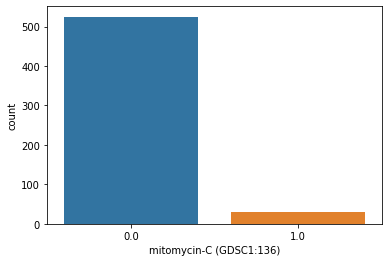

In [9]:
sns.countplot(x = 'mitomycin-C (GDSC1:136)', data = data_mitomycin)
#plt.savefig('label count.png', dpi=300)
(data_mitomycin['mitomycin-C (GDSC1:136)']==1).value_counts()

c:\files\omsa\data and visual analytics\project\code\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


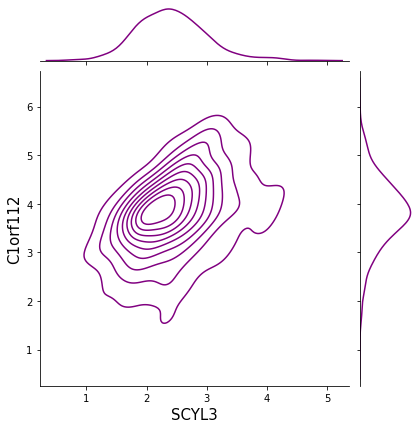

In [10]:
j2 = sns.jointplot(X['SCYL3'], X['C1orf112'], kind='kde', color='purple')
j2.set_axis_labels('SCYL3', 'C1orf112', fontsize=15)

c:\files\omsa\data and visual analytics\project\code\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


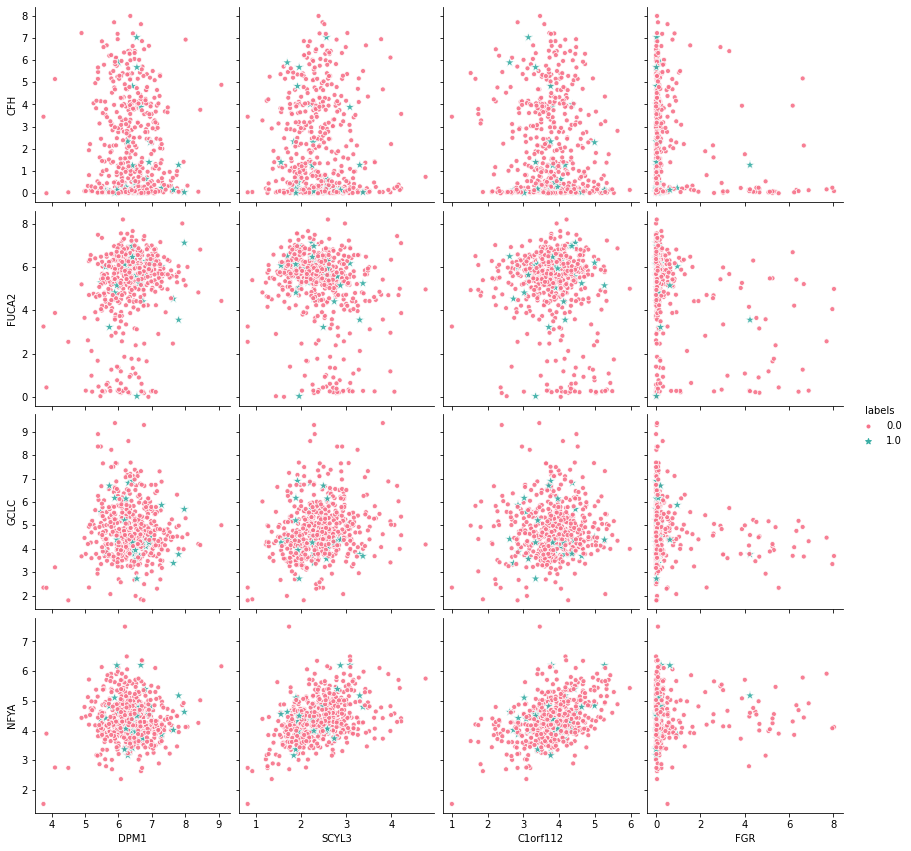

In [11]:

X_with_labels = X.copy()
X_with_labels['labels'] = y
h = sns.pairplot(X_with_labels,
                 x_vars=["DPM1", "SCYL3", "C1orf112", "FGR"],
                 y_vars=["CFH", "FUCA2", "GCLC", "NFYA"], hue='labels', palette="husl", 
                 height=5, markers=['.', '*'], size=3,
                 plot_kws=dict(s=100, alpha=0.9))




for ix in range(2):
    for jy in range(2):
        xlabel = h.axes[ix][jy].get_xlabel()
        ylabel = h.axes[ix][jy].get_ylabel()   
            
for ixx in range(len(h.fig.get_children()[-1].texts)):
    label = h.fig.get_children()[-1].texts[ixx].get_text()
    

#plt.savefig("pairplot1.png", dpi=200)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (443, 19132)
test feature shape:  (111, 19132)


In [13]:
# first scale data just for visualization
# apply PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components=4)
pca1.fit(X)
feature_pca = pca1.transform(X)
feature_pca.shape

(554, 4)

In [14]:
# check how much of variance each PC contributing:
feat_var = np.var(feature_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))
feat_var_rat

array([0.38902067, 0.29455802, 0.21186704, 0.10455427])

<class 'list'>


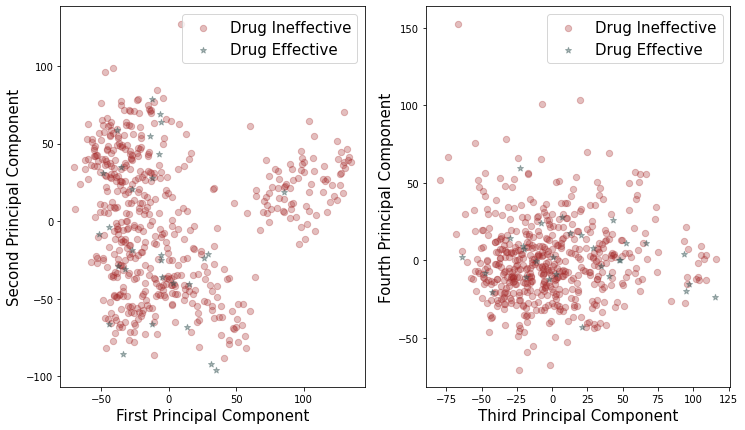

In [15]:
target_list = y.tolist()
print (type(target_list))
feature_pca_X0 = feature_pca[:, 0]
feature_pca_X1 = feature_pca[:, 1]
feature_pca_X2 = feature_pca[:, 2]
feature_pca_X3 = feature_pca[:, 3]

labels = target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Drug Ineffective', 1:'Drug Effective'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_pca_X0[ix], feature_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_pca_X2[ix1], feature_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

#plt.savefig("PCA2D.png", dpi=200)

C:\Users\batmaf1\AppData\Local\Temp\ipykernel_25356\2144676378.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(-100.0, 0, ''),
 Text(-75.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(-25.0, 0, ''),
 Text(0.0, 0, ''),
 Text(25.0, 0, ''),
 Text(50.0, 0, ''),
 Text(75.0, 0, ''),
 Text(100.0, 0, ''),
 Text(125.0, 0, ''),
 Text(150.0, 0, '')]

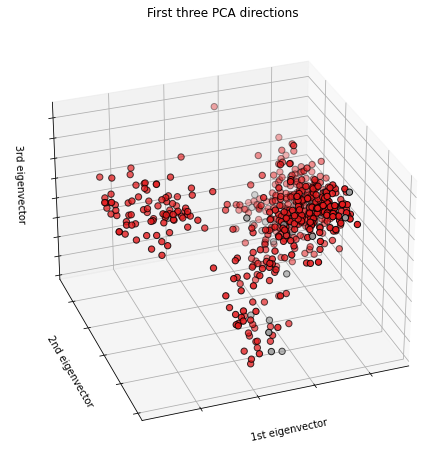

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

#plt.savefig("PCA3D.png", dpi=200)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (387, 19132)
test feature shape:  (167, 19132)


In [18]:
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

smote = EditedNearestNeighbours(sampling_strategy = 'auto', n_neighbors = 5)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import OneSidedSelection
import warnings
from sklearn.metrics import confusion_matrix


weights = np.linspace(.005, .25, 5)

pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('boos', GradientBoostingClassifier())]

check_params= {
    'edNK__n_neighbors': [3,5,8,10,15],
    'boos__learning_rate': [.01,.1,.5,1,3],
    'boos__n_estimators': [5,10,50,100,200,400]
}



pipeline = Pipeline(pipe_steps)

In [23]:
weights = np.linspace(.005, .25, 5)

pipe_steps = [('pca', PCA(n_components=4)), ('edNK', RepeatedEditedNearestNeighbours()), ('boos', GradientBoostingClassifier())]

check_params= {
    'edNK__n_neighbors': [3,5,8,10,15],
    'boos__learning_rate': [.01,.1,.5,1,3],
    'boos__n_estimators': [5,10,50,100,200,400]
}



pipeline = Pipeline(pipe_steps)

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


print ("Start Fitting Training Data")
for cv in tqdm(range(10,11)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, scoring='f1', cv=cv)
    create_grid.fit(X_train, Y_train)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_train, Y_train)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

In [ ]:
# Time for Prediction and Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = create_grid.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_test, Y_pred))

In [ ]:
# first model to try is SVM
# pipeline steps: StandardScaler, PCA, SVM
from tqdm import tqdm_notebook as tqdm
import warnings
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)




pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('DT', DecisionTreeClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
}

pipeline = Pipeline(pipe_steps)

warnings.filterwarnings('ignore')

print('start fitting DT to training data')
for cv in tqdm(range(10,11)):
    grid_DT = GridSearchCV(pipeline, param_grid=check_params, scoring='f1', cv=cv)
    grid_DT.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_DT.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_DT.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_DT.best_params_)





pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('adaboost', AdaBoostClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'adaboost__learning_rate': [.1,.5,1,3],
    'adaboost__n_estimators': [50,100,200,400]
}

pipeline = Pipeline(pipe_steps)

warnings.filterwarnings('ignore')

print('start fitting adaboost to training data')
for cv in tqdm(range(10,11)):
    grid_adaboost = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_adaboost.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_adaboost.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_adaboost.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_adaboost.best_params_)

    
    
    

pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('RF', RandomForestClassifier(random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'RF__n_estimators': [50,100,200],
}

pipeline = Pipeline(pipe_steps)
warnings.filterwarnings('ignore')

print('start fitting RF to training data')
for cv in tqdm(range(10,11)):
    grid_rf = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_rf.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_rf.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_svm.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_svm.best_params_)


    
    
    
pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('SupVM', SVC(kernel='rbf',random_state=42))]
check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'SupVM__gamma' : [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)
warnings.filterwarnings('ignore')

print('start fitting SVM to training data')
for cv in tqdm(range(10,11)):
    grid_svm = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    grid_svm.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_svm.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_svm.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_svm.best_params_)





from sklearn.ensemble import GradientBoostingClassifier
pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('boos', GradientBoostingClassifier())]
check_params= {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'boos__learning_rate': [.1,.5,1,3],
    'boos__n_estimators': [50,100,200,400]
}

pipeline = Pipeline(pipe_steps)
print ("Start Fitting gradient boosting to Training Data")
for cv in tqdm(range(10,11)):
    grid_boost = GridSearchCV(pipeline, param_grid=check_params, scoring='f1',cv=cv)
    grid_boost.fit(X_train, Y_train)
    print ("score for %d fold CV := %3.2f" %(cv, grid_boost.score(X_train, Y_train)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (grid_boost.best_params_)

print ("out of the loop")






pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('LogReg', LogisticRegression(random_state=42))]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'LogReg__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000]
}

pipeline = Pipeline(pipe_steps)

print('start fitting logistic regression to training data ')
for cv in tqdm(range(10,11)):
    grid_logreg = GridSearchCV(pipeline, param_grid=check_params, scoring='f1',cv=cv)
    grid_logreg.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_logreg.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_logreg.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_logreg.best_params_)







pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()),('KNN', KNeighborsClassifier())]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],
    'KNN__n_neighbors': [1, 2, 3, 5, 8, 10, 12, 15, 17, 20],
    'KNN__p': [1,2]
}

pipeline = Pipeline(pipe_steps)

print('start fitting KNN to training data ')
for cv in tqdm(range(10,11)):
    grid_knn = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_knn.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_knn.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_knn.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_knn.best_params_)






pipe_steps = [('edNK', RepeatedEditedNearestNeighbours()), ('GNB', GaussianNB())]

check_params = {
    'edNK__n_neighbors': [1,3,5,8,10,15],

}

pipeline = Pipeline(pipe_steps)

print('start fitting GNB to training data ')
for cv in tqdm(range(10,11)):
    grid_gnb = GridSearchCV(pipeline, param_grid=check_params,scoring='f1', cv=cv)
    grid_gnb.fit(X_train, Y_train)
    print('score for %d fold CV := %3.2f' %(cv, grid_gnb.score(X_train, Y_train)))
    print('!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!')
    print(grid_gnb.best_params_)
    
print ('out of the loop')
print('grid best params: ', grid_gnb.best_params_)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict


probas_DT   = cross_val_predict(grid_DT.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_DT= probas_DT[:,1]


scores_adaboost = cross_val_predict(grid_adaboost.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')


probas_rf = cross_val_predict(grid_rf.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_rf= probas_rf[:,1]


scores_svm = cross_val_predict(grid_svm.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')


scores_boost = cross_val_predict(boost_grid.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')



scores_logreg = cross_val_predict(grid_logreg.best_estimator_, X_train, Y_train, cv=3, method = 'decision_function')



probas_knn = cross_val_predict(grid_knn.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_knn = probas_knn[:,1]


gnb = GaussianNB(priors=None)
probas_gnb = cross_val_predict(grid_gnb.best_estimator_, X_train, Y_train, cv=3, method = 'predict_proba')
scores_gnb = probas_gnb[:,1]

In [ ]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_train, scores_svm)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_train, scores_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, scores_knn)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_train, scores_gnb)
fpr_boost, tpr_boost, thresholds_boost = roc_curve(Y_train, scores_boost)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_train, scores_DT)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(Y_train, scores_adaboost)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_train, scores_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, "b:", linewidth=2, label="Support Vector Machine")
plot_roc_curve(fpr_logreg, tpr_logreg, "Logistic Regression")
plot_roc_curve(fpr_knn, tpr_knn, 'KNN')
plot_roc_curve(fpr_gnb, tpr_gnb, 'Gaussian Naive Bayes')
plot_roc_curve(fpr_boost, tpr_boost, 'Gradient Boosting')
plot_roc_curve(fpr_DT, tpr_DT, 'Decision Tree')
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'adaboost')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')
plt.grid(True)
plt.legend(loc="lower right", fontsize=13)
plt.savefig("ROC_train.png", dpi=200)

In [ ]:
Y_pred = grid_rf.best_estimator_.predict(X_train)
cm = confusion_matrix(Y_train, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_train, Y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict


probas_DT   = cross_val_predict(grid_DT.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_DT= probas_DT[:,1]


scores_adaboost = cross_val_predict(grid_adaboost.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')


probas_rf = cross_val_predict(grid_rf.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_rf= probas_rf[:,1]



scores_svm = cross_val_predict(grid_svm.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')

scores_boost = cross_val_predict(boost_grid.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')



scores_logreg = cross_val_predict(grid_logreg.best_estimator_, X_test, Y_test, cv=3, method = 'decision_function')



# probas_knn = cross_val_predict(grid_knn.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
# scores_knn = probas_knn[:,1]


gnb = GaussianNB(priors=None)
probas_gnb = cross_val_predict(grid_gnb.best_estimator_, X_test, Y_test, cv=3, method = 'predict_proba')
scores_gnb = probas_gnb[:,1]

In [ ]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, scores_svm)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, scores_logreg)
# fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, scores_knn)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, scores_gnb)
fpr_boost, tpr_boost, thresholds_boost = roc_curve(Y_test, scores_boost)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_test, scores_DT)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(Y_test, scores_adaboost)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, scores_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, "b:", linewidth=2, label="Support Vector Machine")
plot_roc_curve(fpr_logreg, tpr_logreg, "Logistic Regression")
# plot_roc_curve(fpr_knn, tpr_knn, 'KNN')
plot_roc_curve(fpr_gnb, tpr_gnb, 'Gaussian Naive Bayes')
plot_roc_curve(fpr_boost, tpr_boost, 'Gradient Boosting')
plot_roc_curve(fpr_DT, tpr_DT, 'Decision Tree')
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'adaboost')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forests')

plt.grid(True)
plt.legend(loc="lower right", fontsize=13)
plt.savefig("ROC_test.png", dpi=200)

In [ ]:

Y_pred = grid_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n")
print(cm)


print(classification_report(Y_test, Y_pred))

In [ ]:
Y_test.value_counts()

In [ ]:
# scaler1 = StandardScaler()
# scaler1.fit(X_test)
X_test_scaled = X_train


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)


classify = grid_svm.best_estimator_.fit(X_test_scaled_reduced, Y_train)


def plot_contours(ax, clf, xx, yy, **params):
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_train.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'No Diabetes (0)',1:'Diabetes (1)'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])


plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

plt.savefig('svm_decision boundary.png', dpi=300)

In [ ]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  X.columns:
    #if i != 'HDL Chol' and i != 'Diabetes':
    if i != 'Glucose':
        print(f"Correlation between Glucose and {i} ==> ",X.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=X,kind = 'reg',color = 'purple')
        plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

clf.fit(X_train, Y_train)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('variable importance.png', dpi=300)